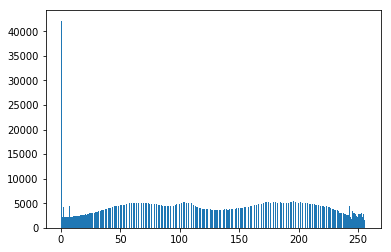

In [49]:
#creating a colormap
from matplotlib.colors import LinearSegmentedColormap
cdict = {'red':   ((0.0, 0.0, 0.0),
                   (0.1, 1.0, 1.0),
                   (1.0, 1.0, 1.0)),

         'green': ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0)),

        'blue':  ((0.0, 0.0, 0.0),
                   (1.0, 0.0, 0.0))
        }
red = LinearSegmentedColormap('Red', cdict)

#cropping the image
from PIL import Image
im = Image.open('Wild052.tif');
width, height=im.size
area = (0, 0, width, height-77 )
im2 = im.crop(area)
im2.save('cropped_Wild052.tif')
img = cv2.imread('cropped_Wild052.tif',0)

#plotting the equalized histogram
import cv2
import matplotlib.pyplot as plt
equ = cv2.equalizeHist(img)
plt.hist(equ.ravel(),256,[0,256])
plt.show()

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False  True False ... False False False]
 [False False  True ... False False False]
 [False False False ... False False False]]


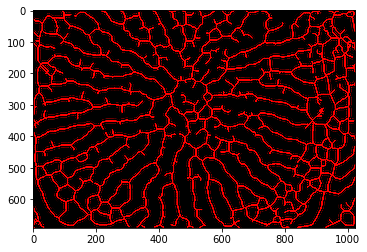

In [52]:
#blurring and thresholding using average blur and mean threshold
ablur = cv2.blur(equ,(17, 17))
a_mthres = cv2.adaptiveThreshold(ablur,1,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,45,4) 
#we are trying to find a threshold and blur that works well for most of the pictures
#we might be able to do this by fitting the equalized histogram to a gaussian (we haven't successfully done this yet)

#skeletonizing and removing the small objects
from skimage.morphology import skeletonize, remove_small_objects
adaptiveskeleton = skeletonize(a_mthres)
cleanskel=remove_small_objects(adaptiveskeleton, min_size=70, connectivity=3)
plt.imshow(cleanskel, cmap=red, interpolation='sinc') 

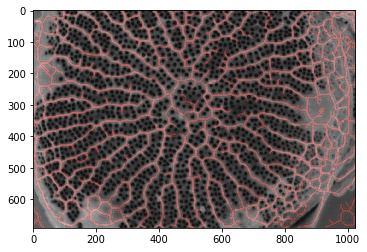

In [51]:
#overlaying the skeleton and original image
plt.imshow(img, cmap='gray', alpha= .9)
plt.imshow(cleanskel, cmap=red, interpolation='sinc', alpha=0.3) 